In [130]:
#importing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder as ohe, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
import itertools
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('/home/msc2/Jupyter/Notebooks/Datasets/Insurance.csv')

<h2>BASIC FEATURE ENGINEERING</h2>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
gender_ohe = ohe().fit(data[['sex']])
region_ohe = ohe().fit(data[['region']])

In [5]:
print(f'{gender_ohe.categories_},{region_ohe.categories_}')

[array(['female', 'male'], dtype=object)],[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


In [6]:
data[['female', 'male']] = gender_ohe.transform(data[['sex']]).toarray()
data[['northeast','northwest','southeast','southwest']] = region_ohe.transform(data[['region']]).toarray()

In [7]:
data

,age,sex,bmi,children,smoker,region,charges,female,male,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0


In [8]:
ndf = data.drop(['sex', 'region', 'male'], axis = 1)

In [9]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   smoker     1338 non-null   object 
 4   charges    1338 non-null   float64
 5   female     1338 non-null   float64
 6   northeast  1338 non-null   float64
 7   northwest  1338 non-null   float64
 8   southeast  1338 non-null   float64
 9   southwest  1338 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 104.7+ KB


In [10]:
ndf['smoker'] = ndf['smoker'].map({'yes':1, 'no':0})

In [11]:
ndf

,age,bmi,children,smoker,charges,female,northeast,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1725.55230,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0,4449.46200,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0,21984.47061,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0,3866.85520,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,2205.98080,1.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,1629.83350,1.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,2007.94500,1.0,0.0,0.0,0.0,1.0


<h2>EXPLORATORY DATA ANALYSIS</h2>

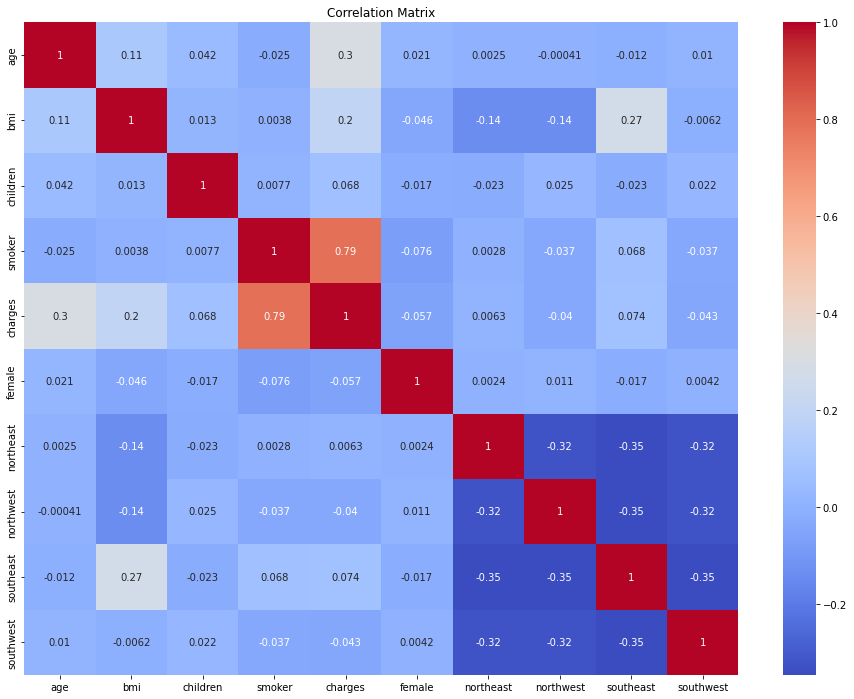

In [12]:
# correlation matrix
correlations = ndf.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

In [13]:
# high +ve correlation between smoker and charges. 
# a slight +ve correlation between age and charges.

# we can do further EDA but before that let us build a basic regression model

In [51]:
def Print(x, x_min, x_max, Q1, Q2, Q3):
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n\n{x.capitalize()}(min) : {x_min}\nQ1 : {Q1}\nQ2(Median) : {Q2}\nQ3 : {Q3}\n{x.capitalize()}(max) : {x_max}')

In [60]:
def plot(x):
    x_min = ndf[x].min()
    x_max = ndf[x].max()
    Q1 = ndf[x].quantile(0.25)
    Q2 = ndf[x].quantile(0.50)
    Q3 = ndf[x].quantile(0.75)
    
    Print(x, x_min, x_max, Q1, Q2, Q3)
    
    fig = plt.figure(figsize=(14, 8))
    plt.subplots_adjust(hspace = 0.4)
    sns.set_palette('Set2')
    
    plt.subplot(221)
    ax1 = sns.distplot(ndf[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = ndf[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=ndf[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(ndf[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Age Attribute:

Age(min) : 18
Q1 : 27.0
Q2(Median) : 39.0
Q3 : 51.0
Age(max) : 64


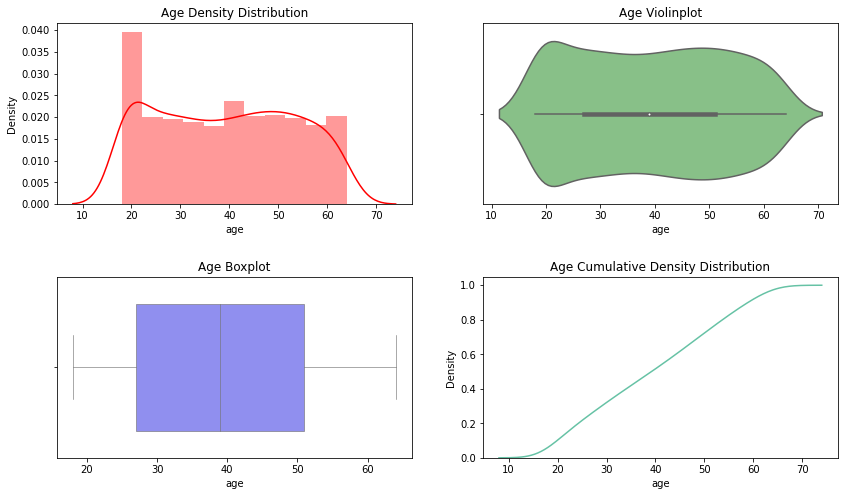

In [61]:
plot('age')

5 Point Summary of Bmi Attribute:

Bmi(min) : 15.96
Q1 : 26.29625
Q2(Median) : 30.4
Q3 : 34.69375
Bmi(max) : 53.13


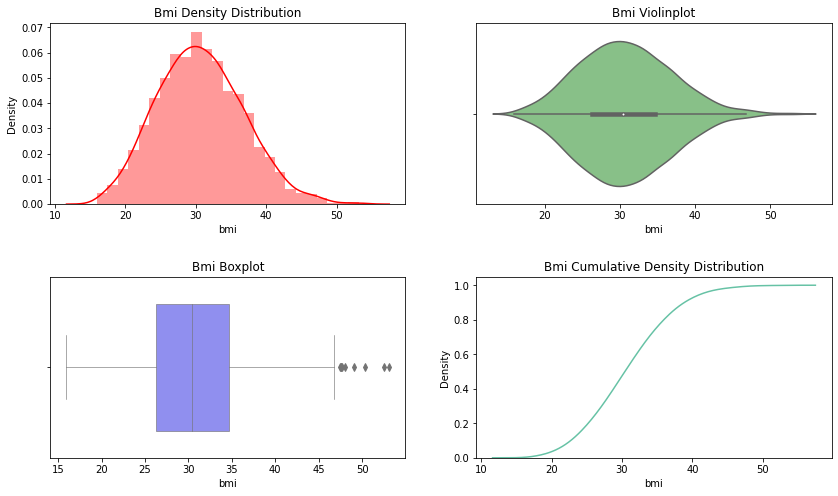

In [62]:
plot('bmi')

In [ ]:
# We have a few outliers in the bmi variable but they are not really outliers as it might represent obese people.

<h2>SCALING THE FEATURES</h2>

In [14]:
ndata = ndf.copy()

In [15]:
scaler = StandardScaler()
ndata[['age','bmi','children','charges']] = scaler.fit_transform(ndata[['age','bmi','children','charges']])
ndata

,age,bmi,children,smoker,charges,female,northeast,northwest,southeast,southwest
0,-1.438764,-0.453320,-0.908614,1,0.298584,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,0,-0.953689,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,0,-0.728675,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0,0.719843,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,0,-0.776802,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0,-0.220551,0.0,0.0,1.0,0.0,0.0
1334,-1.509965,0.206139,-0.908614,0,-0.914002,1.0,1.0,0.0,0.0,0.0
1335,-1.509965,1.014878,-0.908614,0,-0.961596,1.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,-0.908614,0,-0.930362,1.0,0.0,0.0,0.0,1.0


<h2>BASIC LINEAR MODELING

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(ndata.drop('charges', axis = 1), ndata.charges, test_size = 0.2, shuffle = True)

In [17]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1070, 9)
(268, 9)
(1070,)
(268,)


In [18]:
def adj_r2_score(actual, predicted, rc, fc):
    return 1- (1-r2_score(actual, predicted))*(rc-1)/(rc-fc)

In [19]:
model = LinearRegression()
model.fit(Xtrain, ytrain)
model

LinearRegression()

In [20]:
actual = ytrain.to_numpy()
predicted = model.predict(Xtrain)
trainr2 = adj_r2_score(actual, predicted, Xtrain.shape[0], Xtrain.shape[1])

In [21]:
actual = ytest.to_numpy()
predicted = model.predict(Xtest)
testr2 = adj_r2_score(actual, predicted, Xtest.shape[0], Xtest.shape[1])

In [22]:
print(f'Adjusted R2 score for training dataset: {trainr2}')
print(f'Adjusted R2 score for test dataset: {testr2}')

Adjusted R2 score for training dataset: 0.7399882265036439
Adjusted R2 score for test dataset: 0.774094844152555


We can see that the scores are not very good but decent for a basic linear regression model. The model seems to overfit the training data a bit

In [23]:
def adj_r_sqr_lasso(Xtrain,ytrain,Xtest,ytest):
    model = Lasso(alpha = 0.01)  
    model.fit(Xtrain,ytrain)
    r_2_train = model.score(Xtrain,ytrain)
    r_2_test = model.score(Xtest,ytest)
    adj_r_2_train =  1 - (1-r_2_train)*(len(ytrain)-1)/(len(ytrain)-Xtrain.shape[1]-1)
    adj_r_2_test =  1 - (1-r_2_test)*(len(ytest)-1)/(len(ytest)-Xtest.shape[1]-1)  
    return adj_r_2_train,adj_r_2_test

In [24]:
def adj_r_sqr_ridge(Xtrain,ytrain,Xtest,ytest):
    model = Ridge(alpha = 0.1)  
    model.fit(Xtrain,ytrain)
    r_2_train = model.score(Xtrain,ytrain)
    r_2_test = model.score(Xtest,ytest)
    adj_r_2_train =  1 - (1-r_2_train)*(len(ytrain)-1)/(len(ytrain)-Xtrain.shape[1]-1)
    adj_r_2_test =  1 - (1-r_2_test)*(len(ytest)-1)/(len(ytest)-Xtest.shape[1]-1)  
    return adj_r_2_train,adj_r_2_test

In [25]:
adj_r_sqr_lasso(Xtrain, ytrain, Xtest, ytest)

(0.7374531100965662, 0.7738113949003051)

In [26]:
adj_r_sqr_ridge(Xtrain, ytrain, Xtest, ytest)

(0.7397427168914896, 0.7731774112622648)

We can see here that the Lasso and Ridge regression also did not help much. This dataset can be better modeled with RandomForest regression or with polynomial regression

<h2>FEATURE SELECTION

In [63]:
# Now let us do feature selection and select the most optimal model

In [67]:
def get_score(X,y):
    model = LinearRegression()
    model.fit(X,y)
    pred = model.predict(X)
    RSS = mean_squared_error(y,pred)*len(y) 
    R_squared = model.score(X,y) 
    adj_R_squared = 1 - (1-R_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return RSS, R_squared, adj_R_squared 

In [93]:
m = 11
RSS_list, R_squared_list, feature_list, adj_R_squared_list, numb_features = [], [], [], [], []

tdf = ndata.drop('charges', axis = 1)
tdf1 = ndata.charges

for k in range(1,len(tdf.columns) + 1):
    for combo in itertools.combinations(tdf.columns,k):
        tmp_result = get_score(tdf[list(combo)],tdf1)
        RSS_list.append(tmp_result[0])
        R_squared_list.append(tmp_result[1])
        adj_R_squared_list.append(tmp_result[2])
        feature_list.append(combo)
        numb_features.append(len(combo))   

df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'Adj_R_squared': adj_R_squared_list, 'features':feature_list})

In [94]:
df_max_adj = df[df.groupby('numb_features')['Adj_R_squared'].transform(max) == df['Adj_R_squared']]
display(df_max_adj.head(10))

,numb_features,RSS,R_squared,Adj_R_squared,features
3,1,508.754678,0.619765,0.619480,"(smoker,)"
11,2,372.765695,0.721401,0.720983,"(age, smoker)"
46,3,337.875562,0.747477,0.746909,"(age, bmi, smoker)"
129,4,334.908718,0.749695,0.748943,"(age, bmi, children, smoker)"
256,5,333.925028,0.750430,0.749493,"(age, bmi, children, smoker, northeast)"
385,6,333.323734,0.750879,0.749756,"(age, bmi, children, smoker, northeast, northw..."
465,7,333.284723,0.750908,0.749597,"(age, bmi, children, smoker, female, northeast..."
501,8,333.278360,0.750913,0.749414,"(age, bmi, children, smoker, female, northeast..."
502,8,333.278360,0.750913,0.749414,"(age, bmi, children, smoker, female, northeast..."
503,8,333.278360,0.750913,0.749414,"(age, bmi, children, smoker, female, northeast..."


In [88]:
# Here let us choose the model with the 7 features which has the Adjusted R squared value of .749597
# the features are ['age', 'bmi', 'children', 'smoker', 'female', 'northeast', 'northwest']

In [95]:
X = ndata[['age', 'bmi', 'children', 'smoker', 'female', 'northeast', 'northwest']]
y = ndata.charges
#sns.pairplot(tmp_df)

<h2>MODELING WITH THE SELECTED FEATURES

In [97]:
X.shape

(1338, 7)

In [98]:
y.shape

(1338,)

In [123]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size = 0.4, shuffle = True, random_state = 42)

In [124]:
print(Xtr.shape)
print(Xte.shape)
print(ytr.shape)
print(yte.shape)

(802, 7)
(536, 7)
(802,)
(536,)


In [125]:
finalmodel = LinearRegression()
finalmodel.fit(Xtr, ytr)

LinearRegression()

In [126]:
actu = ytr.to_numpy()
pred = finalmodel.predict(Xtr)
trainr = adj_r2_score(actu, pred, Xtr.shape[0], Xtr.shape[1])

In [127]:
actu1 = yte.to_numpy()
pred1 = finalmodel.predict(Xte)
testr = adj_r2_score(actu1, pred1, Xte.shape[0], Xte.shape[1])

In [128]:
print(f'Adjusted R2 score for training dataset: {trainr}')
print(f'Adjusted R2 score for test dataset: {testr}')

Adjusted R2 score for training dataset: 0.7403205036607674
Adjusted R2 score for test dataset: 0.7593452529036959
